## Обезличивание исходных данных и подготовка нескольких примеров
Исходные данные имеют значения для имени БД в формате SID_имя_сервера, что может быть расценено как конфиденциальная инфомация, поэтому заменяю на рандомные uuid'ы.

In [64]:
import numpy as np
import pandas as pd
import uuid
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [234]:
import os
print(os.listdir("./input"))

['tablespace_data.csv', 'tablespace_original.csv']


In [246]:
tablespace_original = pd.read_csv("./input/tablespace_original.csv", decimal=',', index_col=False)

In [247]:
tablespace_original.drop(['TARGET_GUID'], axis=1, inplace=True)
tablespace_original.rename(columns={"ROLLUP_TIMESTAMP": "rollup_timestamp", "DATABASE": "database"}, inplace=True)
tablespace_original['rollup_timestamp'] = pd.to_datetime(tablespace_original['rollup_timestamp'], format = '%d.%m.%Y')
tablespace_original = tablespace_original.set_index('rollup_timestamp')

In [249]:
tablespace_data = tablespace_data.sort_values(by=['rollup_timestamp'])

In [104]:
tablespace_original.drop(['TARGET_GUID'], axis=1, inplace=True)
tablespace_original.rename(columns={"ROLLUP_TIMESTAMP": "rollup_timestamp", "DATABASE": "database"}, inplace=True)
tablespace_original['rollup_timestamp'] = pd.to_datetime(tablespace_original['rollup_timestamp'])
tablespace_original = tablespace_original.set_index('rollup_timestamp')

In [105]:
uuids = [str(uuid.uuid4()) for x in range(len(tablespace_original['database'].drop_duplicates()))]

In [107]:
deperson_map = dict(zip(tablespace_original['database'].drop_duplicates(), uuids))

In [277]:
tablespace_data = tablespace_original.copy()
tablespace_data['database'] = tablespace_data['database'].map(deperson_map)

In [279]:
tablespace_data.tail(20)

,database,REDOSIZE_GB,DBTIME,USED_GB
rollup_timestamp,,,,
2020-03-03,81a413dc-9cd1-4984-8b66-460a528e8beb,0.0,575.0,42.0
2020-03-04,81a413dc-9cd1-4984-8b66-460a528e8beb,0.0,633.0,40.0
2020-03-05,81a413dc-9cd1-4984-8b66-460a528e8beb,0.0,605.0,881.0
2020-03-06,81a413dc-9cd1-4984-8b66-460a528e8beb,0.0,604.0,42.0
2020-03-07,81a413dc-9cd1-4984-8b66-460a528e8beb,0.0,569.0,42.0
2020-03-08,81a413dc-9cd1-4984-8b66-460a528e8beb,0.0,612.0,41.0
2020-03-09,81a413dc-9cd1-4984-8b66-460a528e8beb,0.0,966.0,42.0
2020-03-10,81a413dc-9cd1-4984-8b66-460a528e8beb,0.0,592.0,689.0
2020-03-11,81a413dc-9cd1-4984-8b66-460a528e8beb,0.0,569.0,42.0


In [113]:
tablespace_data.to_csv('./input/tablespace_data.csv', sep='\t')

## Подбор интересных примеров для анализа

In [320]:
tablespace_data.groupby('database')['database'].value_counts().sort_values().tail(20)

database                              database                            
1daa6d83-74ec-48f2-8dc5-6f778d90cf5d  1daa6d83-74ec-48f2-8dc5-6f778d90cf5d    766
5a044ae9-e679-4859-abaf-dfe05052818b  5a044ae9-e679-4859-abaf-dfe05052818b    766
684f06cf-ab7c-4204-bbf0-6dc2022d0353  684f06cf-ab7c-4204-bbf0-6dc2022d0353    766
6f3891aa-2752-42e8-8feb-2a022fdecb7e  6f3891aa-2752-42e8-8feb-2a022fdecb7e    766
16fa7488-ccff-4f73-923c-8944eeebaeb3  16fa7488-ccff-4f73-923c-8944eeebaeb3    766
c56c890e-5ef1-4ecf-b4a9-e46f3c4731c8  c56c890e-5ef1-4ecf-b4a9-e46f3c4731c8    766
73ca1388-ef2c-4382-be29-b1249adb8c39  73ca1388-ef2c-4382-be29-b1249adb8c39    766
22bd091c-8129-4860-bfb4-163a33cb3ba3  22bd091c-8129-4860-bfb4-163a33cb3ba3    766
b5f71f95-a8aa-4f9d-9b4b-6663f81de1d4  b5f71f95-a8aa-4f9d-9b4b-6663f81de1d4    766
da01f118-c26d-48e3-8b74-847e00bcb421  da01f118-c26d-48e3-8b74-847e00bcb421    766
43250b74-5efa-47fd-9e96-d9ec7472bc2b  43250b74-5efa-47fd-9e96-d9ec7472bc2b    766
de5c6e01-3190-4bbd-a167

In [326]:
# sample = tablespace_data[tablespace_data['database'] == '2c32e16a-dad9-4559-8f18-4bd409738481']
sample = tablespace_data[tablespace_data['database'] == '8237bf33-d19c-4910-9206-c6d43f0b498f']
sample = sample.sort_values(by=['rollup_timestamp'])

In [327]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 766 entries, 2018-06-01 to 2020-07-05
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   database     766 non-null    object 
 1   REDOSIZE_GB  766 non-null    float64
 2   DBTIME       766 non-null    float64
 3   USED_GB      766 non-null    float64
dtypes: float64(3), object(1)
memory usage: 29.9+ KB


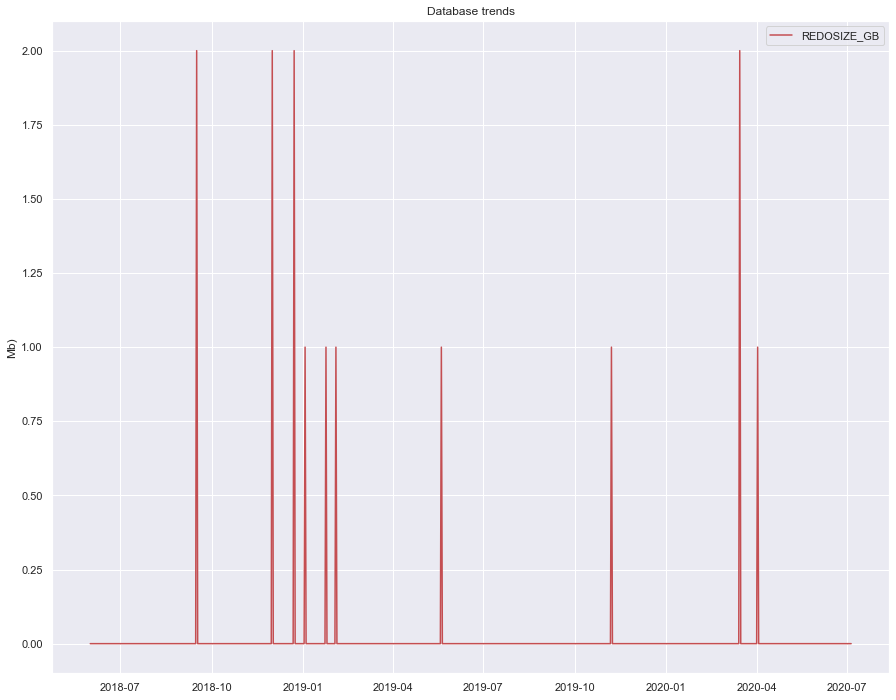

In [328]:
plt.figure(figsize=(15, 12))
plt.plot(sample.index, sample['REDOSIZE_GB'], 'r-', label = 'REDOSIZE_GB')
plt.title('Database trends')
plt.ylabel('Mb)');
plt.legend();
plt.show()

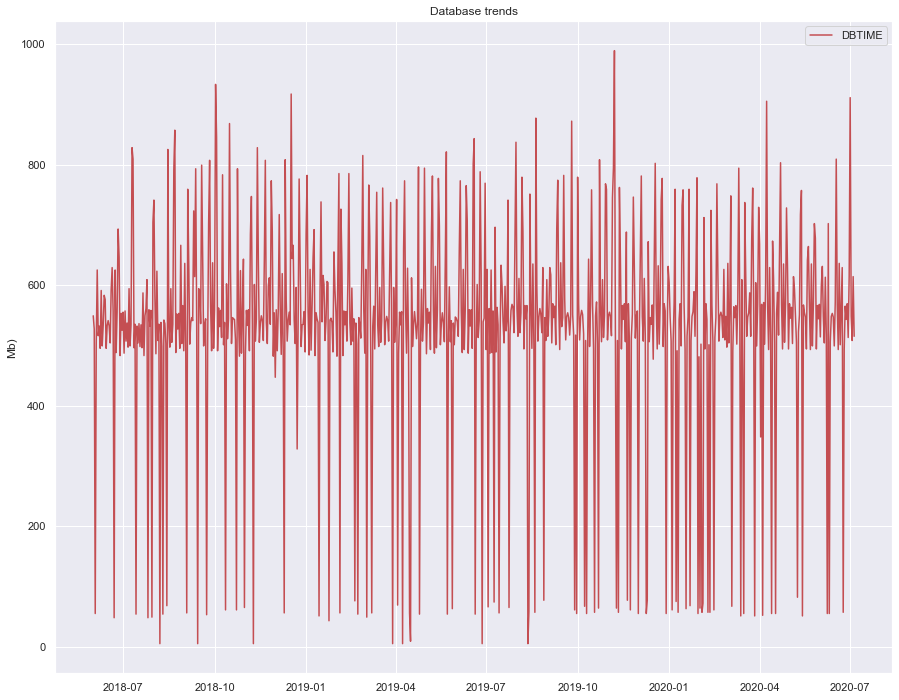

In [329]:
plt.figure(figsize=(15, 12))
plt.plot(sample.index, sample['DBTIME'], 'r-', label = 'DBTIME')
plt.title('Database trends')
plt.ylabel('Mb)');
plt.legend();
plt.show()

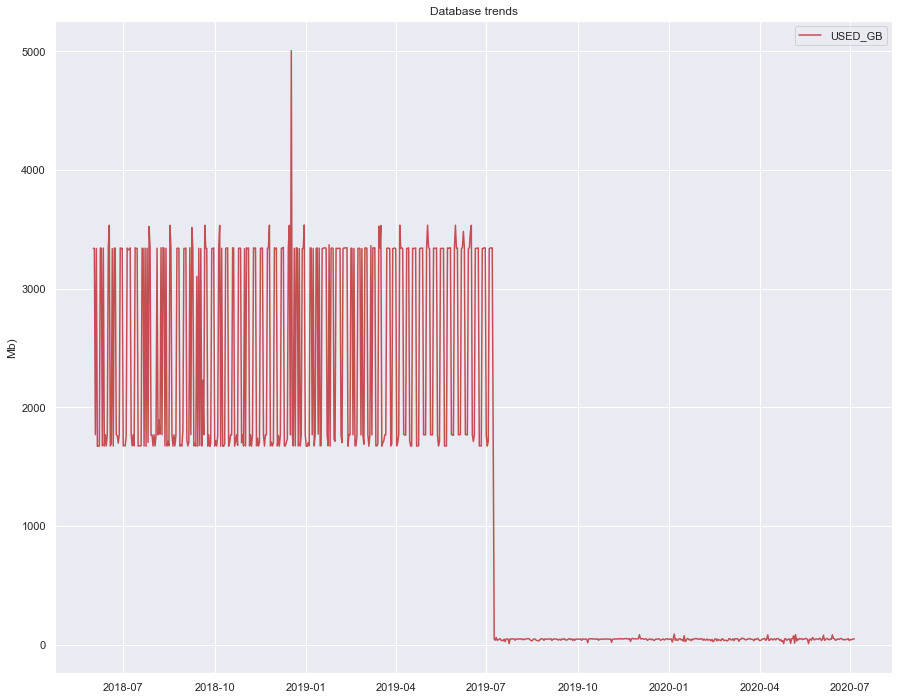

In [330]:
plt.figure(figsize=(15, 12))
plt.plot(sample.index, sample['USED_GB'], 'r-', label = 'USED_GB')
plt.title('Database trends')
plt.ylabel('Mb)');
plt.legend();
plt.show()

In [295]:
sample.head()

,database,REDOSIZE_GB,DBTIME,USED_GB
rollup_timestamp,,,,
2018-06-01,2c32e16a-dad9-4559-8f18-4bd409738481,0.0,185.0,627.0
2018-06-02,2c32e16a-dad9-4559-8f18-4bd409738481,2.0,196.0,266.0
2018-06-03,2c32e16a-dad9-4559-8f18-4bd409738481,0.0,205.0,203.0
2018-06-04,2c32e16a-dad9-4559-8f18-4bd409738481,0.0,228.0,204.0
2018-06-05,2c32e16a-dad9-4559-8f18-4bd409738481,0.0,222.0,205.0


In [331]:
sample.drop(['REDOSIZE_GB','USED_GB'], axis=1, inplace=True)
sample.rename(columns={"DBTIME": "value"}, inplace=True)

In [332]:
sample.head()

,database,value
rollup_timestamp,,
2018-06-01,8237bf33-d19c-4910-9206-c6d43f0b498f,549.0
2018-06-02,8237bf33-d19c-4910-9206-c6d43f0b498f,527.0
2018-06-03,8237bf33-d19c-4910-9206-c6d43f0b498f,55.0
2018-06-04,8237bf33-d19c-4910-9206-c6d43f0b498f,502.0
2018-06-05,8237bf33-d19c-4910-9206-c6d43f0b498f,625.0


In [333]:
sample.to_csv('./input/sample2.csv', sep='\t')